# Combination of Words from Sentences
> This script processes a text file to generate all possible combinations of words from each sentence, excluding common "useless" words. The combinations are stored in a structured list for further analysis or processing. 

1.  Key Steps:
Read and Clean Text:

2. Load text from a specified file.
Split the text into sentences.
3. Clean each sentence by removing newline characters and leading/trailing whitespace.
Filter Out Useless Words:

4. Define a list of common words that do not add significant value to word combinations.
5. Split each sentence into words and remove the useless words.
6. Generate Combinations:

> For each sentence, generate all possible combinations of two words.
Convert the combinations from tuples to lists for easier handling.
Output:

**Print the resulting list of word combinations for each sentence**

In [ ]:
#USE OF COMBINATION IN LIST OF SENTENCES

import numpy as np
from itertools import permutations,combinations

# Reading the file
with open("/home/sohanx1/Downloads/Sohan/sohan/PYTHON WORKS/Files_for_Coding/CNN/practice.txt", 'r', encoding='Latin-1') as f:
    text = f.read()

# Splitting and cleaning sentences
sentence_list = text.split('.')  # .split() automatically forms a list
sentence_list = [s.replace('\n', '').strip() for s in sentence_list if s.strip()]
# Wightless words
Useless_Words = ['is', 'are', 'the', 'they', 'to', 'a', 'and', 'of', 'as', 'on']

# Filter words from sentence_list
Words_list = []
for sentence in sentence_list:
    words = sentence.split()
    filtered_words = [word.lower() for word in words if word.lower() not in Useless_Words]
    Words_list.append(filtered_words)

# Generate combinations of words in Words_list
anagram_list = []
for word_list in Words_list:
   
    perms = list(combinations(word_list, 2))  # Generate combinations of 2 words
    combinations_list = [list(comb) for comb in perms]  # Convert each combination tuple to a list because using Combination converts inner list to tuples [(...),(...)] but we need it as [[....],[....],[....]]
    anagram_list.append(combinations_list)

print(anagram_list)


In [ ]:
all=[]
for i in Words_list:  # Words_list contains list of sentences(in strings now) in a list eliminating all Useless_Words 
    all.extend(i)     #Forming a new list with all the strings from each list of the list (here Words_list)
all_vocabulary=list(set(all)) #using set to remove duplicate vocabulary and again keeping it in list

# ONE HOT ENCODING 

* One-hot encoding is a technique used to convert categorical data into a binary (0 or 1) vector representation. Each unique category is represented by a vector with a length equal to the number of unique categories in the dataset, with all elements set to 0 except for the one corresponding to the category, which is set to 1.

# Why Use One-Hot Encoding?

- Machine Learning Compatibility: Many machine learning algorithms require numerical input data, and one-hot encoding provides a way to represent categorical data numerically.
- No Ordinal Relationship: One-hot encoding is suitable for categorical data without any ordinal relationship, ensuring that the algorithm doesn't infer any incorrect order or priority among the categories.

In [ ]:
    #One hot Encoding
    import numpy as np
    One_hot=np.zeros((len(all_vocabulary),len(all_vocabulary)))
    for i,v in enumerate(all_vocabulary):
        One_hot[i,i]=1
    print(len(One_hot)) 
    X=One_hot
    Y=One_hot
       

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input
model=Sequential()
vocal_size=len(x[0])
embed_size=2
model.add(Input(shape=(vocal_size,)))
model.add(Dense(embed_size,activation='linear'))
model.add(Dense(vocal_size,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(X,Y,epochs=1000)

In [ ]:
weighs=model.get_weights()[0]
word_embedding={}
words_dict = {word: index for index, word in enumerate(all_vocabulary)}
for words in all_vocabulary:
    word_embedding[words]=weighs[words_dict[words]]
for w in all_vocabulary:
    print(w,":",word_embedding[w])  

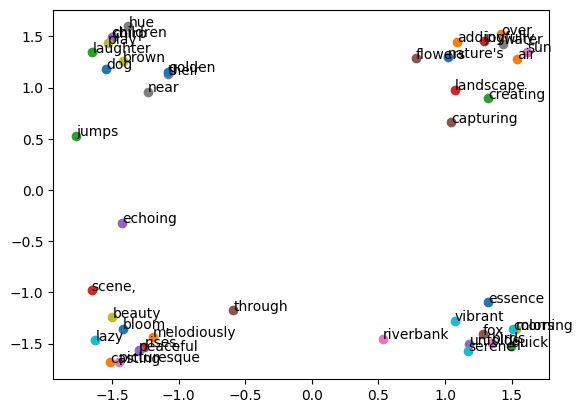

In [90]:
import matplotlib.pyplot as mt
for w in all_vocabulary:
    cord=word_embedding[w]
    mt.scatter(cord[0],cord[1])
    mt.annotate(w,(cord[0],cord[1]))